### COM361 &mdash; Introdução a Otimização &mdash; 2022, Prof. Amit ###

# Gerenciamento de Dívidas de Cartões de Crédito #

#### Camila Maia de Carvalho (camilamaia@poli.ufrj.br), Ruth Menezes (ruthmenezesbr@poli.ufrj.br)

*****

### Índice

1. [Introdução](#1.-Introdução)
2. [Modelo Matemático](#Modelo)
3. [Solução](#3.-Solução)
    1. [Adicionando limites de crédito no modelo](#Limites)
    2. [Controle Preditivo](#Preditivo)
    3. [Esquema Ponzi](#Ponzi)
4. [Resultados e Discussão](#4.-Resultados-e-discussão)
5. [Conclusão](#5.-Conclusão)
6. [Referências Bibliográficas](#Bibliografia)

## 1. Introdução ##

O projeto em questão visa o estudo e a elaboração de um modelo de otimização de gerenciamento de dívidas de cartões de crédito, de forma a obter uma solução viável economicamente para saldá-las. 

Esse tema mostra-se de extrema relevância no cenário atual de endividamento da população brasileira. De acordo com o portal de notícias do G1, atualmente o país conta com cerca de 69 milhões de pessoas inadimplentes, sendo as dívidas de cartão de crédito o motivo de mais da metade desses endividamentos. Esse fato é de extrema preocupação, dado que o cartão é uma das modalidades com os juros mais altos do mercado e, em caso de desorganização financeira, a dívida tende a continuar aumentando, podendo chegar a se tornar uma pendência de valor exorbitante e insustentável a longo prazo.

Dessa forma, é fundamental que as pessoas tenham ferramentas que as auxiliem na plena administração de suas dívidas e, por esse motivo, será feita a construção do modelo de gerenciamento de dívidas de cartão de crédito. Nele, será pautado um indivíduo que possui mais de uma dívida, em diferentes cartões, sujeitos a condições distintas referentes a cada instituição credora.

Em suma, ao longo desse relatório será apresentado um modelo considerando um indíviduo endividado, que possui três cartões de crédito com saldos distintos ($x_1$,$x_2$ e $x_3$), sujeitos a diferentes taxas de juros ($\alpha_1$ , $\alpha_2$ e $\alpha_3$). Também será levada em consideração a existência de uma conta corrente de saldo $y(k)$, da qual é retirada uma quantia $u(k)$, utilizada para pagar a dívida no instante $k$.

Além disso, baseado nos mais recentes relatórios do Banco Central do Brasil, será considerada para esse modelo uma taxa de juros de cheque especial de aproximadamente $7,8\%$ ao mês e uma taxa básica de juros para o país em torno de $1,4\%$ ao mês.

## 2. Modelo Matemático <a class="anchor" id="Modelo"></a> 

O modelo matemático que descreve o problema se dá pela equação abaixo: 

$x_i(k + 1) = (1 + \alpha_i)x_i(k) - u_i(k)$

Isto é, o saldo do cartão $i$ no instante $(k + 1)$ é igual a $1$ mais a taxa de juros, multiplicada pelo saldo no instante $k$, subtraída do valor $u(k)$ retirado da conta corrente para quitar parte da dívida. Dessa forma, é criada a codição de juros compostos, que aumentam a dívida exponencialmente com o passar do tempo.

Além disso, pode ser modelada também a conta corrente: 

$y(k+1) = y(k) - u_{total}(k)$

Em outros termos, o saldo da conta corrente no momento $k + 1$ é igual ao saldo da conta no instante $k$ menos o valor total $u(k)$ retirado da conta para saldar a dívida. 

Sendo essas as restrições definidas para o nosso problema, pode-se apontar também as variáveis de decisão e a função objetivo. Nesse caso, as variáveis de decisão são representadas pelos pagamentos mensais realizados para saldar a dívida, pois isso é de fato o que o indívudo pode controlar, e o saldo das dívidas dos três cartões em cada instante de tempo. Já para a função objetivo a ser otimizada, tem-se o modelo quadrático proposto pelo livro "Introduction to Optimization", de Edwin K. P. Chong e Stanislaw H.:

minimizar 
$\frac{1}{2}\sum_{i=1}^{n}(q(x_i)^2 + r(u_i)^2)$

Bem como aponta o livro citado, os parâmetros $q$ e $r$ refletem a prioridade no trade-off entre a redução da dívida e a dificuldade de pagamento da mesma. Quanto mais ansioso o indivíduo estiver para reduzir a sua dívida, maior o valor de $q$ em relação a $r$. Por outro lado, quanto mais relutante ele estiver em realizar os pagamentos, maior será o valor de $r$ em relação a $q$. Variando esses parâmetros, é possível otimizar a dívida levando em consideração pessoas em diferentes situações financeiras. 

O modelo em questão é do tipo LQR (Linear Quadratic Regulator), onde busca-se controlar a função combinando dois objetivos conflitantes de forma a manter um estado pequeno, enquanto mantém-se também um esforço de controle pequeno.

Tendo tudo isso em mente, pode-se chegar na seguinte descrição formal para o problema:

Min $\frac{1}{2} \sum_{i=1}^{n} q((x_{1i})^2 + (x_{2i})^2 + (x_{3i})^2) + r((u_{1i})^2 + (u_{2i})^2 + (u_{3i})^2) $

Sujeito a: 

$x_1(k + 1) = (1 + \alpha_1)x_1(k) - u_1(k) \\ $ 
$x_2(k + 1) = (1 + \alpha_2)x_2(k) - u_2(k) \\ $
$x_3(k + 1) = (1 + \alpha_3)x_3(k) - u_3(k) \\ $
$y(k+1) = y(k) - u_{total}(k) \\ $

## 3. Solução ##

Em primeiro lugar, iremos apresentar uma versão mais simplificada do problema proposto. Nesse caso, iremos considerar que o indivíduo possui apenas uma dívida em um cartão de crédito, sendo a taxa de juros de cheque especial de $7,8\%$ ao mês e um prazo para quitação da dívida de $24$ meses.

Além disso, vamos considerar que os parâmetros $r$ e $q$ valem, respectivamente, $10$ e $1$, ou seja, demos um peso $10x$ maior à dificuldade em realizar um pagamento no lugar de diminuir a dívida rapidamente.

In [14]:
using JuMP, Plots, LinearAlgebra, Clp, MosekTools, StatsPlots

Valor a ser pago para quitar a dívida: 6449.37


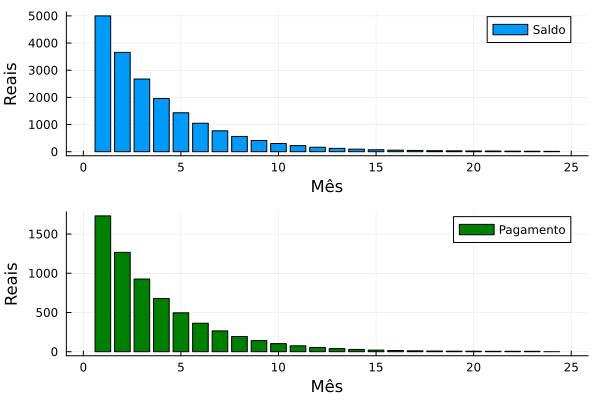

In [58]:
q = 1
r = 10
taxa = 0.078  # Taxa do cheque especial de 7,8% ao mês

t = [i for i=1:24] # Tempo escolhido para quitação da dívida de 24 meses

m = Model(optimizer_with_attributes(Mosek.Optimizer, "QUIET"=>true))

@variable(m, u[i = 1:24]) # Pagamento em cada instante de tempo
@variable(m, x[i = 1:24]) # Saldo da dívida em cada instante de tempo
@variable(m, y[i = 1:24]) # Conta corrente de onde se retira o dinheiro para pagamento da dívida

# Restrições do problema

for t in 1:(size(t)[1]-1)
    @constraint(m, x[t+1] .== (1 + taxa)*x[t] - u[t]) # Dinâmica de juros compostos da dívida
    @constraint(m, y[t+1] .== y[t] - u[t]) # Restrições da conta corrente
end

@constraint(m, x[1] == 5000) # Valor inicial da dívida
@constraint(m, y[1] == 10000) # Valor inicial em conta corrente
@constraint(m, y .>= 0)
@constraint(m, x .>= 0)
@constraint(m, u .>= 0)

@objective(m, Min, 0.5*(q*sum(x.^2) +  r*sum(u.^2)) )  #Função Objetivo

optimize!(m)

x = JuMP.value.(x)
u = JuMP.value.(u)

p1 = Plots.bar(t, x, label = "Saldo", xlabel = "Mês", ylabel = "Reais")
p2 = Plots.bar(t, u, label = "Pagamento", color="green", xlabel = "Mês", ylabel = "Reais")

println("Valor a ser pago para quitar a dívida: ", round(sum(u), digits=2))

plot(p1, p2, layout = (2, 1))

Após essa primeira análise, vamos partir para o cerne do problema: um indivíduo que possui três dívidas em 3 cartões de crédito distintos, considerando a situação abaixo:

- Realizar um pagamento é 10x mais díficil que reduzir a dívida. Logo, $r = 10\cdot q$
- Taxas mensais relativas a cada cartão: 
    - $\alpha_1 = 1,5\%$
    - $\alpha_2 = 3,5\%$
    - $\alpha_3 = 4,2\%$
- Valor inicial da dívida: $20000$, sendo:
    - Cartão 1 = $9000$
    - Cartão 2 = $6000$
    - Cartão 1 = $5000$
- Saldo inicial da conta corrente: $35000$

Valor a ser pago para quitar a dívida: 22033.66


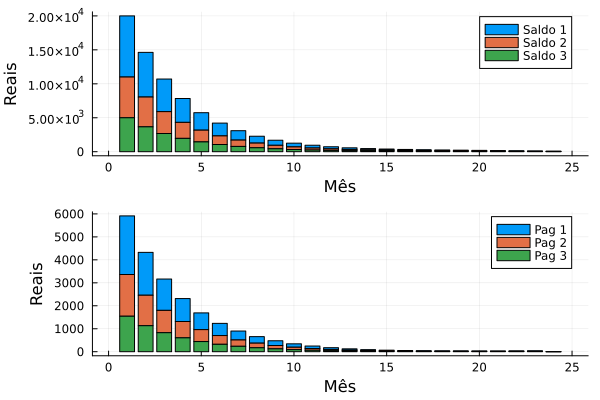

In [63]:
q = 1
r = 10
taxa_1 = 0.015
taxa_2 = 0.035
taxa_3 = 0.042

t = [i for i=1:24] # Tempo escolhido para quitação da dívida de 24 meses

m = Model(optimizer_with_attributes(Mosek.Optimizer, "QUIET"=>true))

# Pagamento da dívida em cada instante de tempo
@variable(m, u_1[i = 1:24])
@variable(m, u_2[i = 1:24])
@variable(m, u_3[i = 1:24])

# Saldo da dívida em cada instante de tempo
@variable(m, x_1[i = 1:24]) 
@variable(m, x_2[i = 1:24])
@variable(m, x_3[i = 1:24])

# Conta corrente de onde se retira o dinheiro para pagamento da dívida
@variable(m, y[i = 1:24]) 

# Restrições do problema
for t in 1:(size(t)[1]-1)
    @constraint(m, x_1[t+1] .== (1 + taxa_1)*x_1[t] - u_1[t])
    @constraint(m, x_2[t+1] .== (1 + taxa_2)*x_2[t] - u_2[t])
    @constraint(m, x_3[t+1] .== (1 + taxa_3)*x_3[t] - u_3[t])

    @constraint(m, y[t+1] .== y[t] - (u_1[t] + u_2[t] + u_3[t]))
end

@constraint(m, x_1[1] == 9000) # Valor da dívida 1
@constraint(m, x_2[1] == 6000) # Valor da dívida 2
@constraint(m, x_3[1] == 5000) # Valor da dívida 3
@constraint(m, y[1] == 35000) # Valor inicial em conta corrente
@constraint(m, y .>= 0)
@constraint(m, x_1 .>= 0)
@constraint(m, x_2 .>= 0)
@constraint(m, x_3 .>= 0)
@constraint(m, u_1 .>= 0)
@constraint(m, u_2 .>= 0)
@constraint(m, u_3 .>= 0)

@objective(m, Min, 0.5*(q*(sum(x_1.^2) + sum(x_2.^2) + sum(x_3.^2))  +  r*(sum(u_1.^2) + sum(u_2.^2) + sum(u_3.^2))) )  #Função Objetivo

optimize!(m)

x_1 = JuMP.value.(x_1)
x_2 = JuMP.value.(x_2)
x_3 = JuMP.value.(x_3)

u_1 = JuMP.value.(u_1)
u_2 = JuMP.value.(u_2)
u_3 = JuMP.value.(u_3)

p3 = groupedbar([x_1 x_2 x_3], bar_position = :stack, label=["Saldo 1" "Saldo 2" "Saldo 3"], xlabel = "Mês", ylabel = "Reais")
p4 = groupedbar([u_1 u_2 u_3], bar_position = :stack, label = ["Pag 1" "Pag 2" "Pag 3"], xlabel = "Mês", ylabel = "Reais")

println("Valor a ser pago para quitar a dívida: ", round(sum(u_1) + sum(u_2) + sum(u_3), digits=2))

plot(p3, p4, layout = (2, 1)) 

### 3.A. Adicionando limites de crédito no modelo <a class="anchor" id="Limites"></a>

A seguir, será modelada a situação em que os cartões de crédito possuem limites pré-definidos e que o dono do cartão efetua compras durante o horizonte de controle, respeitando o limite de cada cartão. 

Sendo assim, o dinheiro gasto com as compras, modelado como um vetor aleatório que respeita o limite mensal de cada cartão, irá aumentar o saldo devedor atrelado ao cartão utilizado.

Valor pago nas dívidas: 63333.59
Saldo em conta restante: 36176.65


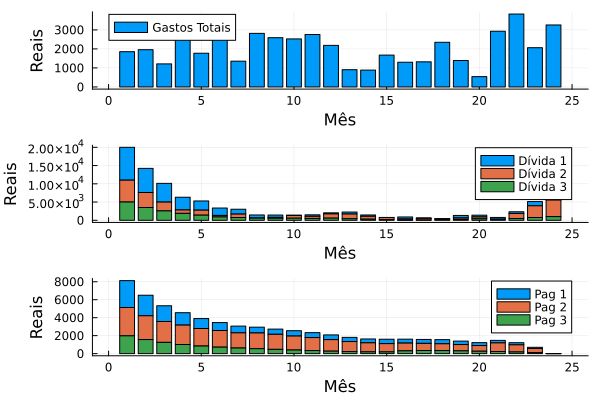

In [85]:
q = 1
r = 10
taxa_1 = 0.015
taxa_2 = 0.035
taxa_3 = 0.042

# Limites mensais do cartão
limite_1 = 1000 
limite_2 = 2500
limite_3 = 500

# Gastos a cada mês
gastos_1 = [rand(0:limite_1) for i=1:24] 
gastos_2 = [rand(0:limite_2) for i=1:24] 
gastos_3 = [rand(0:limite_3) for i=1:24] 

gastos_totais = gastos_1 .+ gastos_2 .+ gastos_3

t = [i for i=1:24] # Tempo escolhido para quitação da dívida de 24 meses

m = Model(optimizer_with_attributes(Mosek.Optimizer, "QUIET"=>true))

# Pagamento da dívida em cada instante de tempo
@variable(m, u_1[i = 1:24])
@variable(m, u_2[i = 1:24])
@variable(m, u_3[i = 1:24])

# Saldo da dívida em cada instante de tempo
@variable(m, x_1[i = 1:24])
@variable(m, x_2[i = 1:24])
@variable(m, x_3[i = 1:24])

#Conta corrente de onde se retira o dinheiro para pagamento da dívida
@variable(m, y[i = 1:24]) 

#Restrições do problema
for t in 1:(size(t)[1]-1)
    @constraint(m, x_1[t+1] .== (1 + taxa_1)*(x_1[t] + gastos_1[t]) - u_1[t]) # As novas compras agora aumentam a dívida
    @constraint(m, x_2[t+1] .== (1 + taxa_2)*(x_2[t] + gastos_2[t]) - u_2[t])
    @constraint(m, x_3[t+1] .== (1 + taxa_3)*(x_3[t] + gastos_3[t]) - u_3[t])

    @constraint(m, y[t+1] .== y[t] - (u_1[t] + u_2[t] + u_3[t]))
end

@constraint(m, x_1[1] == 9000) # Valor da dívida
@constraint(m, x_2[1] == 6000) # Valor da dívida
@constraint(m, x_3[1] == 5000) # Valor da dívida
@constraint(m, y[1] == 100000) # Valor inicial em conta corrente
@constraint(m, y .>= 0)
@constraint(m, x_1 .>= 0)
@constraint(m, x_2 .>= 0)
@constraint(m, x_3 .>= 0)
@constraint(m, u_1 .>= 0)
@constraint(m, u_2 .>= 0)
@constraint(m, u_3 .>= 0)

@objective(m, Min, 0.5*(q*(sum(x_1.^2) + sum(x_2.^2) + sum(x_3.^2))  +  r*(sum(u_1.^2) + sum(u_2.^2) + sum(u_3.^2))) )  #Função Objetivo

optimize!(m)

x_1 = JuMP.value.(x_1)
x_2 = JuMP.value.(x_2)
x_3 = JuMP.value.(x_3)

u_1 = JuMP.value.(u_1)
u_2 = JuMP.value.(u_2)
u_3 = JuMP.value.(u_3)

y = JuMP.value.(y)

p1 = Plots.bar(t, gastos_totais, label="Gastos Totais", xlabel = "Mês", ylabel = "Reais")
p2 = groupedbar([x_1 x_2 x_3], bar_position = :stack, label=["Dívida 1" "Dívida 2" "Dívida 3"], xlabel = "Mês", ylabel = "Reais")
p3 = groupedbar([u_1 u_2 u_3], bar_position = :stack, label = ["Pag 1" "Pag 2" "Pag 3"], xlabel = "Mês", ylabel = "Reais")


println("Valor pago nas dívidas: ", round(sum(u_1) + sum(u_2) + sum(u_3), digits=2))
println("Saldo em conta restante: ", round(y[24], digits=2))

plot(p1, p2, p3, layout = (3, 1)) 


### 3.B. Controle Preditivo <a class="anchor" id="Preditivo"></a>

Agora, baseado na ideia de controle preditivo, será implementado um esquema de controle mensal que utiliza apenas informações do passado e do mês atual, ao invés de informações do horizonte inteiro, como feito no item anterior.

O processo consiste em escolher $u(k)$ para que a função objetivo no instante $k+1$ seja otimizada. Isso se repete para todos os instantes de tempo utilizando a função objetivo dentro de um loop.

Valor pago para quitar a dívida: 22654.4


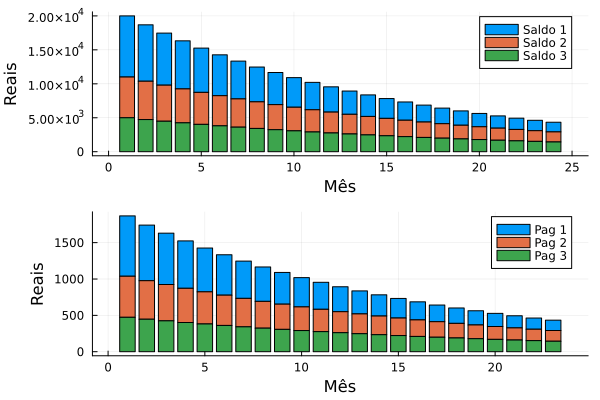

In [84]:
N = 24
q, r = 1, 10
taxa_1, taxa_2, taxa_3  = 0.015, 0.035, 0.042
t = [i for i=1:N]

#Vetor de memória para os saldos da dívida e valores em conta corrente
x1, x2, x3, y = zeros(N), zeros(N), zeros(N), zeros(N)

#Vetor de memória para os pagamentos da dívida em cada instante de tempo
u1, u2, u3 = zeros(N-1), zeros(N-1), zeros(N-1)

# Definição de valores iniciais da dívida e da conta corrente.
x1[1] = 9000
x2[1] = 6000
x3[1] = 5000
y[1] = 35000

for t in 2:N

    m = Model(optimizer_with_attributes(Mosek.Optimizer, "QUIET"=>true))

    @variable(m, u1n >= 0)
    @variable(m, u2n >= 0)
    @variable(m, u3n >= 0)

    # Saldos das dívidas no instante à frente
    @variable(m, x1n >= 0) 
    @variable(m, x2n >= 0)
    @variable(m, x3n >= 0)

    # Conta corrente no instante à frente
    @variable(m, yn >= 0)

    # Nossas restrições agora olham para o passado para definir seu valor
    @constraint(m, x1n == (1 + taxa_1)*x1[t-1] - u1n)
    @constraint(m, x2n == (1 + taxa_2)*x2[t-1] - u2n)
    @constraint(m, x3n == (1 + taxa_3)*x3[t-1] - u3n)

    @constraint(m, yn == y[t-1] - (u1n + u2n + u3n))

    @objective(m, Min, 0.5*(q*(x1n^2 + x2n^2 + x3n^2)  +  r*(u1n^2 + u2n^2 + u3n^2)))

    optimize!(m)

    #Guardando os valores no vetor de memória
    x1[t], x2[t], x3[t] = JuMP.value.(x1n), JuMP.value.(x2n), JuMP.value.(x3n)
    u1[t-1], u2[t-1], u3[t-1] = JuMP.value.(u1n), JuMP.value.(u2n), JuMP.value.(u3n)
    y[t] = JuMP.value.(yn)
    
end

p3 = groupedbar([x1 x2 x3], bar_position = :stack, label=["Saldo 1" "Saldo 2" "Saldo 3"], xlabel = "Mês", ylabel = "Reais")
p4 = groupedbar([u1 u2 u3], bar_position = :stack, label = ["Pag 1" "Pag 2" "Pag 3"], xlabel = "Mês", ylabel = "Reais")

println("Valor pago para quitar a dívida: ", round(sum(u1) + sum(u2) + sum(u3), digits=2))

plot(p3, p4, layout = (2, 1)) 

### 3.C. Esquema Ponzi <a class="anchor" id="Ponzi"></a>

Por último, o modelo será utilizado para investigar por quanto tempo um esquema Ponzi, esquema de pirâmide no qual um cartão é utilizado para quitar a dívida dos outros cartões, se sustentaria. Segue a história a ser avaliada:

Um indivíduo fraudador descobriu a senha de três cartões, com taxas e limites de crédito distintos. Seu objetivo é maximizar suas compras durante o maior tempo possível, sem que o dono do cartão perceba os gastos. O esquema durará até que todas as dívidas atinjam o limite máximo, tornando os cartões inutilizáveis. Nesse instante, o fraudador já estará foragido no exterior. Há, então, um trade-off entre a vontade de gastar do fraudador, e seu medo de ser descoberto no esquema. Portanto, a nossa variável de decisão são as compras que ele faz e a função objetivo é maximizar o tempo de funcionamento do esquema. Temos, então, o problema na forma padrão a seguir:

Os limites totais de cada cartão:

$x_1 \leq 20000 \\ $
$x_2 \leq 30000 \\ $
$x_3 \leq 40000 \\ $

Restrições dos gastos, que tornam o cartão inutilizável a partir de um determinado valor:

$c_1(k+1) = 0 \ se\ x_1(k) \geq 20000 \\ $
$c_2(k+1) = 0 \ se\ x_2(k) \geq 30000 \\ $
$c_3(k+1) = 0 \ se\ x_3(k) \geq 40000 \\ $

Restrições de comportamento das dívidas dos cartões:

$x_1(k+1) = (1+\alpha_1)x_1(k) + c_1(k) \\ $ 
$x_2(k+1) = (1+\alpha_2)x_2(k) + c_2(k) \\ $
$x_3(k+1) = (1+\alpha_3)x_3(k) + c_3(k) \\ $

E, por fim, a função objetivo:

Max $\sum_{i=1}^{n} (\alpha \cdot t_{total} + \beta \cdot c_{total} - \gamma \cdot d_{total})$

Onde se quer maximizar o tempo, os gastos, e minimizar $d_{total}$ (o risco do fraudador ser descoberto), e $\alpha$, $\beta$, e $\gamma$ são constantes de parametrização.

## 4. Resultados e discussão ##

Por fim, é possível tirar conclusões a partir dos resultados obtidos com os cálculos acima apresentados.

Primeiramente, em relação a dívida com apenas um cartão, pudemos notar que- por ser um modelo que trabalha com juros composto- é muito mais vantajoso para o indivíduo endividado que pague parcelas maiores nas primeiras parcelas das dívidas e que elas diminuam conforme for chegando perto das últimas parcelas. Isso porque os juros compostos se referem a parcela do mês anterior, fazendo com que os valores das taxas incidam sobre um valor menor caso o indivíduo pague um valor maior inicialmente.

A mesma lógica se aplica para um indivíduo que possui 3 dívidas em 3 cartões, entretanto ele deve escolher pagar primeiro o cartão que possui a maior taxa de juros. Para exemplificar melhor porque ele deve escolher uma taxa maior, a seguir têm-se um exemplo com uma taxa de juros de 30% ao mês.

Em relação a situação de modelagem do dinheiro como um vetor aleatório, é possível notar que houve uma maior dificuldade no controle da dívida devido aos gastos com compras, que aumentam a dívida sem que haja um aumento do saldo da conta do indivíduo. Tal fator torna mais difícil saldar a dívida, principalmente se o indivíduo não tem alguma fonte de renda mensal. 

Se tratando do modelo com controle preditivo, o qual utiliza apenas informações do passado e do mês atual, obtivemos dificuldade para realizar a otimização do modelo, justamente por este não prever a função para todos os instantes de tempo. Isso se torna nítido ao fazer uma comparação entre os dois gráficos, no gráfico de controle preditivo as dívidas decaem de modo mais lento.

## 5. Conclusão ##

Como é possível notar, as dívidas de um indivíduo podem ser saldadas através do modelo simples apresentado, onde o indivíduo possui saldo na conta corrente o qual utiliza para pagar as dívidas. Entretanto, quando são adicionadas algumas dificuldades ao problema, como a aleatoriedade nos gastos do cartão, o controle da dívida acaba se tornando mais difícil. 

No futuro, o modelo em questão pode ser melhor desenvolvido através da adição de alguns fatores, como o indivíduo passar a ganhar uma renda mensal ou adicionar taxas como CDI ou IPCA ao modelo.

Por fim, é possível notar que o modelo possui muita importância visto o cenário econômico atual das famílias brasileiras. Além disso, é importante ressaltar que dívidas com juros mais altos dificultam o crescimento das fampilias com baixo poderio econômico.   

## 6. Referências bibliográficas ##

1. Livro "An introdution to optimization" 
2. https://medium.com/@controleavancadoemultivariavel/projeto-de-controladores-%C3%B3timos-lqr-42e16cfe48ce
3. https://fei.edu.br/sbai/SBAI2007/docs/30870_1.pdf
4. https://www.bcb.gov.br/estatisticas/reporttxjuros?parametros=tipopessoa:1;modalidade:216;encargo:101
5. https://www.bcb.gov.br/controleinflacao/historicotaxasjuros
6. https://www.bcb.gov.br/estatisticas/reporttxjuros?parametros=tipopessoa:1;modalidade:204;encargo:101
7. https://blog.aprovatotal.com.br/juros-compostos-como-calcular-formula-e-exemplo/#:~:text=Como%20funciona%20nos%20Juros%20Compostos,00%20mais%2010%25%20desse%20valor